In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, LeaveOneOut
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
#Reading the distance data from text file into dataframe X
file_path = 'test111DataMin.txt'

with open(file_path, 'r') as file:
    lines = file.readlines()

data = [list(map(int, line.strip().split())) for line in lines]

X = pd.DataFrame(data)

print(X.shape)

(70, 9933)


In [3]:
X

,0,1,2,3,4,5,6,7,8,9,...,9923,9924,9925,9926,9927,9928,9929,9930,9931,9932
0,114,103,160,157,166,165,179,170,88,10,...,71,29,78,39,73,38,70,35,51,36
1,95,80,149,150,161,164,170,173,39,17,...,45,46,60,63,57,62,52,56,65,43
2,74,85,134,123,138,125,154,153,65,15,...,83,13,91,16,86,22,83,21,61,45
3,59,51,149,134,166,153,157,146,93,18,...,44,54,59,68,57,68,53,62,75,53
4,125,116,158,169,161,174,181,192,78,13,...,72,11,78,14,74,19,71,19,54,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,73,65,21,23,15,17,7,12,8,4,...,66,40,76,60,73,59,68,54,60,43
66,90,84,149,128,154,132,181,159,29,13,...,52,8,59,13,55,11,52,11,65,58
67,85,55,79,58,80,63,64,47,90,8,...,6,13,6,18,4,17,4,15,49,51
68,74,39,79,56,77,59,88,67,85,11,...,52,23,53,31,49,29,47,27,53,51


In [4]:
#classification dataFrame Y
data=[1]*30+[0]*40
Y=pd.DataFrame(data)
print(Y)


    0
0   1
1   1
2   1
3   1
4   1
.. ..
65  0
66  0
67  0
68  0
69  0

[70 rows x 1 columns]


In [5]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,9923,9924,9925,9926,9927,9928,9929,9930,9931,9932
0,114,103,160,157,166,165,179,170,88,10,...,71,29,78,39,73,38,70,35,51,36
1,95,80,149,150,161,164,170,173,39,17,...,45,46,60,63,57,62,52,56,65,43
2,74,85,134,123,138,125,154,153,65,15,...,83,13,91,16,86,22,83,21,61,45
3,59,51,149,134,166,153,157,146,93,18,...,44,54,59,68,57,68,53,62,75,53
4,125,116,158,169,161,174,181,192,78,13,...,72,11,78,14,74,19,71,19,54,39


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Columns: 9933 entries, 0 to 9932
dtypes: int64(9933)
memory usage: 5.3 MB


In [7]:
import numpy as np
np.array(X)

array([[114, 103, 160, ...,  35,  51,  36],
       [ 95,  80, 149, ...,  56,  65,  43],
       [ 74,  85, 134, ...,  21,  61,  45],
       ...,
       [ 85,  55,  79, ...,  15,  49,  51],
       [ 74,  39,  79, ...,  27,  53,  51],
       [ 46,  42,  53, ...,  14,  80,  83]], dtype=int64)

In [15]:
#Decision Tree Classifier
cv = LeaveOneOut()
predictions = []

model = DecisionTreeClassifier()
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append(y_pred[0])
print(predictions)
accuracy = accuracy_score(Y, predictions)

print(f"Accuracy: {accuracy}")

[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]
Accuracy: 0.7142857142857143


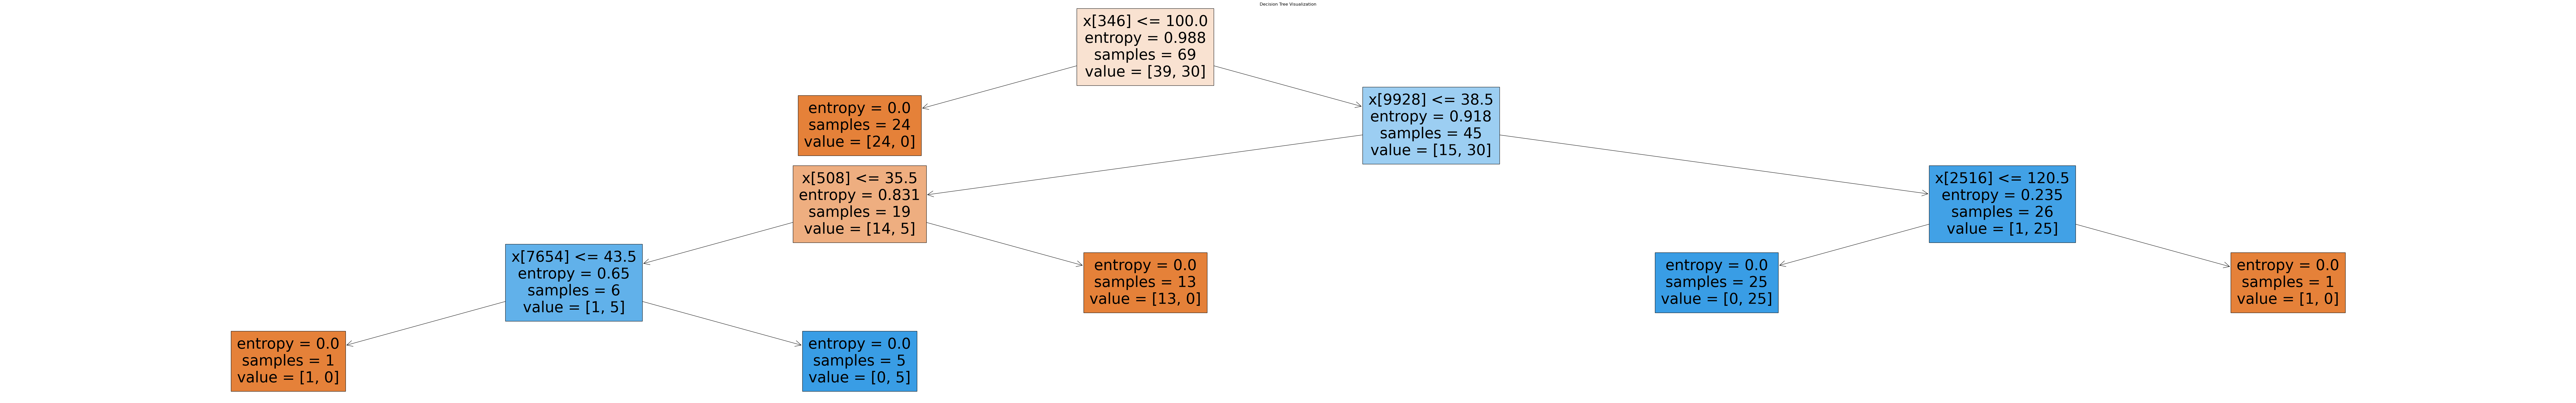

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming x_train and y_train are your training data
# Instantiate the DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)

# Fit the classifier on the training data
classifier.fit(X_train, y_train)

# Visualize the decision tree
plt.figure(figsize=(130, 20))
plot_tree(classifier, filled=True )
plt.title("Decision Tree Visualization")
plt.show()


In [10]:
#LinearSVC

cv = LeaveOneOut()
predictions = []

model = LinearSVC(max_iter=10000)

scaler = StandardScaler()
X1 = scaler.fit_transform(X)

for train_index, test_index in cv.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    predictions.append(y_pred[0])

print(predictions)
accuracy = accuracy_score(np.ravel(Y), predictions)

print(f"Accuracy: {accuracy}")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Accuracy: 0.8571428571428571


In [11]:
#Logistic Regression

cv = LeaveOneOut()
predictions = []

model = LogisticRegression(max_iter=1000)

scaler = StandardScaler()
X1 = scaler.fit_transform(X)

for train_index, test_index in cv.split(X1):
    X_train, X_test = X1[train_index], X1[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    predictions.append(y_pred[0])

print(predictions)
accuracy = accuracy_score(np.ravel(Y), predictions)

print(f"Accuracy: {accuracy}")

[1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Accuracy: 0.8428571428571429


In [12]:
#voting based model
cv = LeaveOneOut()
predictions = []

model1 = LogisticRegression(random_state=1, solver='newton-cg', max_iter=1000)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')

for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Reshape target variable
    y_train = y_train.values.ravel()

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append(y_pred[0])

print(predictions)
accuracy = accuracy_score(Y.values.ravel(), predictions)

print(f"Accuracy: {accuracy}")


[0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy: 0.7571428571428571


In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
cv = LeaveOneOut()
predictions = []
for train_index, test_index in cv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    predictions.append(y_pred[0])

print(predictions)
accuracy = accuracy_score(np.ravel(Y), predictions)

print(f"Accuracy: {accuracy}")


[1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
Accuracy: 0.8857142857142857
